In [3]:
import os
import numpy as np
from PIL import Image
from keras_facenet import FaceNet


In [4]:
# Initialize the FaceNet model from keras-facenet
embedder = FaceNet()
print("FaceNet model loaded successfully!")


FaceNet model loaded successfully!


In [5]:
def preprocess_image(image_path):
    """
    Loads an image, converts it to RGB, resizes to 160x160 (FaceNet input size),
    normalizes pixel values, and adds a batch dimension.
    """
    image = Image.open(image_path).convert("RGB")
    image = image.resize((160, 160))
    image_array = np.asarray(image) / 255.0  # Normalize to [0,1]
    return np.expand_dims(image_array, axis=0)  # Shape becomes (1, 160, 160, 3)


In [6]:
def load_dataset(dataset_path):
    """
    Loads images from each subfolder under 'dataset_path/familiar/'.
    Assumes each subfolder is named after a person and contains cropped face images.
    Returns:
      - embeddings: Numpy array of embeddings for all images.
      - labels: Numpy array of corresponding person names.
    """
    embeddings = []
    labels = []
    
    # Path to the 'familiar' folder containing subfolders for each person
    familiar_path = os.path.join(dataset_path, "/kaggle/input/facenet-data/PImg/Familiar")
    
    # Loop over each subfolder (each person)
    for person in os.listdir(familiar_path):
        person_folder = os.path.join(familiar_path, person)
        if not os.path.isdir(person_folder):
            continue  # Skip files if any
        
        # Process each image in the person's folder
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            # Skip if it's a directory (just in case)
            if os.path.isdir(image_path):
                continue
            try:
                # Preprocess the image and generate embedding
                img = preprocess_image(image_path)
                embedding = embedder.embeddings(img)[0]  # Get embedding vector
                
                embeddings.append(embedding)
                labels.append(person)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")
    
    return np.array(embeddings), np.array(labels)


In [7]:
# Set the path to your dataset folder
dataset_path = "/kaggle/input/facenet-data"  # Adjust if your dataset folder is located elsewhere

# Load dataset: get embeddings and corresponding labels (person names)
embeddings, labels = load_dataset(dataset_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━

In [8]:
print("Embeddings shape:", embeddings.shape)
print("Labels shape:", labels.shape)
print("Unique persons:", np.unique(labels))


Embeddings shape: (105, 512)
Labels shape: (105,)
Unique persons: ['Ajay' 'Christy' 'Haritha' 'Minnu' 'Omkar' 'Sneha' 'Sree']


In [9]:
import os
import pickle

# Define the save directory (Kaggle working directory)
save_dir = '/kaggle/working'

# Create a file path for the pickle file
save_path = os.path.join(save_dir, 'embeddings_labels.pkl')

# Save embeddings and labels as a tuple
with open(save_path, 'wb') as f:
    pickle.dump((embeddings, labels), f)

print(f"Embeddings and labels saved successfully in: {save_path}")


Embeddings and labels saved successfully in: /kaggle/working/embeddings_labels.pkl


In [10]:
import os
import numpy as np

# Define the save directory (Kaggle working directory)
save_dir = '/kaggle/working'

# Save embeddings and labels as separate .npy files
np.save(os.path.join(save_dir, 'embeddings.npy'), embeddings)
np.save(os.path.join(save_dir, 'labels.npy'), labels)

print("Embeddings and labels saved successfully as .npy files in Kaggle working directory!")


Embeddings and labels saved successfully as .npy files in Kaggle working directory!


# Evaluate

In [11]:
import pickle
import numpy as np

# Load stored embeddings and labels
with open('/kaggle/working/embeddings_labels.pkl', 'rb') as f:
    stored_embeddings, stored_labels = pickle.load(f)

print("Stored embeddings and labels loaded successfully!")


Stored embeddings and labels loaded successfully!


In [12]:
from keras_facenet import FaceNet
import cv2

# Load FaceNet model
facenet = FaceNet()

def get_embedding(image_path):
    """Extract FaceNet embedding from a given image."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to FaceNet input size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    embedding = facenet.embeddings(img)  # Extract embedding
    return embedding[0]  # Return as 1D array


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

def find_best_match(test_embedding, stored_embeddings, stored_labels, threshold=0.5):
    """Find the best match for a test image using cosine similarity."""
    if test_embedding is None:
        return "Error"

    similarities = cosine_similarity([test_embedding], stored_embeddings)[0]  # Compute cosine similarity
    best_match_index = np.argmax(similarities)  # Get index of highest similarity
    best_match_score = similarities[best_match_index]  # Get best similarity score

    print(f"Best Match Score: {best_match_score:.2f}")

    if best_match_score >= threshold:
        return stored_labels[best_match_index]  # Recognized as familiar
    else:
        return "Unknown"  # Instead of "Unfamiliar," return "Unknown" for low scores


In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Sample test images (all known persons)
test_images = [
    "/kaggle/input/facenet-data/PImg/Familiar/Ajay/i01.jpeg",
    "/kaggle/input/facenet-data/PImg/Familiar/Christy/i003.jpeg",
]

true_labels = ["Ajay", "Christy"]  # Only familiar labels

predicted_labels = []

for img_path, true_label in zip(test_images, true_labels):
    test_embedding = get_embedding(img_path)  # Extract embedding
    predicted_label = find_best_match(test_embedding, stored_embeddings, stored_labels)
    predicted_labels.append(predicted_label)
    print(f"True: {true_label} | Predicted: {predicted_label}")

# Evaluate model performance
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Best Match Score: -0.05
True: Ajay | Predicted: Unknown
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Best Match Score: 0.06
True: Christy | Predicted: Unknown
Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

        Ajay       0.00      0.00      0.00       1.0
     Christy       0.00      0.00      0.00       1.0
     Unknown       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [17]:
e1 = get_embedding("/kaggle/input/facenet-data/PImg/Familiar/Sneha/i32.jpg")
e2 = get_embedding("/kaggle/input/facenet-data/PImg/Familiar/Sneha/i32.jpg")  # Same image

similarity = cosine_similarity([e1], [e2])[0][0]
print(f"Self-Similarity: {similarity:.2f}")  # Should be close to 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Self-Similarity: 1.00


In [18]:
# Load stored embeddings
stored_embeddings = np.load("/kaggle/working/embeddings.npy")
stored_labels = np.load("/kaggle/working/labels.npy")

# Debug: Print first stored embedding values
print("Stored Embeddings (first 5 values):", stored_embeddings[0][:5])
print("Norm of first stored embedding:", np.linalg.norm(stored_embeddings[0]))  # Should be ~1.0


Stored Embeddings (first 5 values): [ 0.01040816  0.01323743 -0.08136162  0.03703691 -0.00583529]
Norm of first stored embedding: 0.99999994


# with augmentation

In [19]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_facenet import FaceNet  # pip install keras-facenet
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [20]:
def load_images_from_folder(folder, target_size=(160, 160)):
    images = []
    labels = []
    # Each subfolder is assumed to be one class (person)
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                img_path = os.path.join(label_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    # Convert BGR (OpenCV) to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # Resize to the target dimensions (FaceNet expects 160x160)
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Change 'your_dataset_folder' to your actual dataset directory
folder_path = '/kaggle/input/facenet-data/PImg/Familiar'
images, labels = load_images_from_folder(folder_path)
print("Loaded {} images from {} classes.".format(len(images), len(np.unique(labels))))


Loaded 105 images from 7 classes.


In [21]:
datagen = ImageDataGenerator(
    rotation_range=10,          # rotate images by up to 10 degrees
    width_shift_range=0.1,      # shift images horizontally by up to 10%
    height_shift_range=0.1,     # shift images vertically by up to 10%
    shear_range=0.1,            # apply shearing transformations
    zoom_range=0.1,             # zoom in/out by up to 10%
    horizontal_flip=True,       # randomly flip images horizontally
    fill_mode='nearest'         # fill in missing pixels
)


In [24]:
"""sample_img = images[0]  # pick a sample image
plt.figure(figsize=(10, 10))
aug_iter = datagen.flow(np.expand_dims(sample_img, 0), batch_size=1)

for i in range(9):
    aug_img = next(aug_iter)[0].astype('uint8')
    plt.subplot(3, 3, i+1)
    plt.imshow(aug_img)
    plt.axis('off')
plt.suptitle("Augmented Versions of a Sample Image")
plt.show()"""


'sample_img = images[0]  # pick a sample image\nplt.figure(figsize=(10, 10))\naug_iter = datagen.flow(np.expand_dims(sample_img, 0), batch_size=1)\n\nfor i in range(9):\n    aug_img = next(aug_iter)[0].astype(\'uint8\')\n    plt.subplot(3, 3, i+1)\n    plt.imshow(aug_img)\n    plt.axis(\'off\')\nplt.suptitle("Augmented Versions of a Sample Image")\nplt.show()'

In [25]:
embedder = FaceNet()  # loads the pre-trained FaceNet model


In [26]:
def get_augmented_embedding(image, embedder, datagen, n_augmentations=5):
    # Get embedding from the original image
    emb_list = [embedder.embeddings([image])[0]]
    
    # Generate augmented images and extract their embeddings
    aug_iter = datagen.flow(np.expand_dims(image, 0), batch_size=1, shuffle=False)
    for _ in range(n_augmentations):
        aug_img = next(aug_iter)[0].astype('uint8')
        emb = embedder.embeddings([aug_img])[0]
        emb_list.append(emb)
        
    # Return the average embedding
    return np.mean(emb_list, axis=0)

# Example: compute and display the embedding dimension
sample_embedding = get_augmented_embedding(sample_img, embedder, datagen, n_augmentations=5)
print("Embedding dimension:", sample_embedding.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Embedding dimension: (512,)


In [35]:
all_embeddings = []
for img in images:
    emb = get_augmented_embedding(img, embedder, datagen, n_augmentations=5)
    all_embeddings.append(emb)
all_embeddings = np.array(all_embeddings)
print("Computed embeddings for {} images.".format(len(all_embeddings)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

# Saving embeddings

In [37]:
import os
import pickle

# Define file paths
save_dir = "facenet/embeddings/"
label_encoder_path = os.path.join(save_dir, "label_encoder.pkl")
scaler_path = os.path.join(save_dir, "scaler.pkl")
embeddings_path = os.path.join(save_dir, "face_embeddings.pkl")

# Ensure directory exists
os.makedirs(save_dir, exist_ok=True)

# Save label encoder
with open(label_encoder_path, 'wb') as f:
    pickle.dump(le, f)
print(f"Label encoder saved to {label_encoder_path}")

# Save scaler
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_path}")

# Save embeddings and labels
with open(embeddings_path, 'wb') as f:
    pickle.dump({"embeddings": all_embeddings, "labels": labels}, f)
print(f"Embeddings saved to {embeddings_path}")


Label encoder saved to facenet/embeddings/label_encoder.pkl
Scaler saved to facenet/embeddings/scaler.pkl
Embeddings saved to facenet/embeddings/face_embeddings.pkl


In [112]:
# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Scale embeddings for better classifier performance
scaler = StandardScaler()
X = scaler.fit_transform(all_embeddings)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.9523809523809523


In [113]:
def predict_face(image, embedder, datagen, clf, le, scaler, n_augmentations=5):
    emb = get_augmented_embedding(image, embedder, datagen, n_augmentations)
    emb_scaled = scaler.transform([emb])
    pred = clf.predict(emb_scaled)
    prob = clf.predict_proba(emb_scaled)
    return le.inverse_transform(pred)[0], np.max(prob)

# Test the prediction on a sample image (you can replace images[0] with a new image)
predicted_label, confidence = predict_face(images[0], embedder, datagen, clf, le, scaler)
print("Predicted Label:", predicted_label)
print("Confidence Score:", confidence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Label: Haritha
Confidence Score: 0.663949382818568


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label: Sneha
Confidence Score: 0.7616803072959988


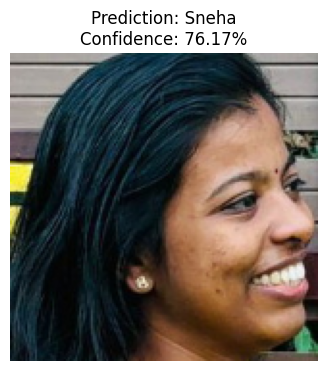

In [114]:
# Cell 10 – Test on a Single Image

# Load and preprocess a single test image
test_img_path = '/kaggle/input/facerecognition-training/test.jpg'  # Replace with your test image path
test_img = cv2.imread(test_img_path)
if test_img is None:
    raise ValueError(f"Image not found at {test_img_path}")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (160, 160))  # Resize to FaceNet's expected input size

# Predict the label and confidence using our helper function
predicted_label, confidence = predict_face(test_img, embedder, datagen, clf, le, scaler, n_augmentations=5)

print("Predicted Label:", predicted_label)
print("Confidence Score:", confidence)

# Optionally, visualize the test image with the prediction
plt.figure(figsize=(4,4))
plt.imshow(test_img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()


In [40]:
# Get the encoded class label
encoded_label = le.transform([predicted_label])[0]

print("Predicted Label:", predicted_label)
print("Encoded Label:", encoded_label)
print("Confidence Score:", confidence)


Predicted Label: Sneha
Encoded Label: 5
Confidence Score: 0.7862012354067779


In [41]:
# Print all class label encodings
class_mapping = {label: idx for idx, label in enumerate(le.classes_)}
print("Class Encoding Mapping:")
for label, idx in class_mapping.items():
    print(f"{label}: {idx}")


Class Encoding Mapping:
Ajay: 0
Christy: 1
Haritha: 2
Minnu: 3
Omkar: 4
Sneha: 5
Sree: 6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label: Unfamiliar
Confidence Score: 0.3501463688076192


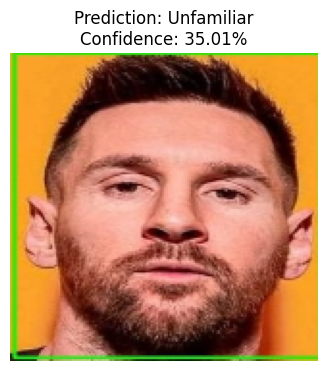

In [115]:
# Load and preprocess a single test image
test_img_path = '/kaggle/input/facerecognition-training/output2.jpg'  # Replace with your test image path
test_img = cv2.imread(test_img_path)
if test_img is None:
    raise ValueError(f"Image not found at {test_img_path}")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (160, 160))  # Resize to FaceNet's expected input size

# Predict the label and confidence using our helper function
predicted_label, confidence = predict_face(test_img, embedder, datagen, clf, le, scaler, n_augmentations=5)

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.50:
    predicted_label = "Unfamiliar"

print("Predicted Label:", predicted_label)
print("Confidence Score:", confidence)

# Optionally, visualize the test image with the prediction
plt.figure(figsize=(4,4))
plt.imshow(test_img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()


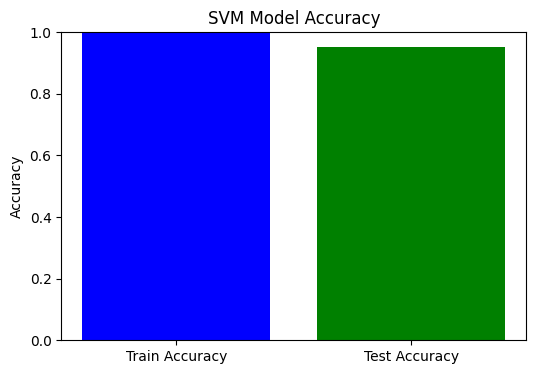

In [47]:
plt.figure(figsize=(6,4))

# Bar chart for train vs test accuracy
plt.bar(["Train Accuracy", "Test Accuracy"], [clf.score(X_train, y_train), clf.score(X_test, y_test)], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("SVM Model Accuracy")
plt.show()


<Figure size 800x600 with 0 Axes>

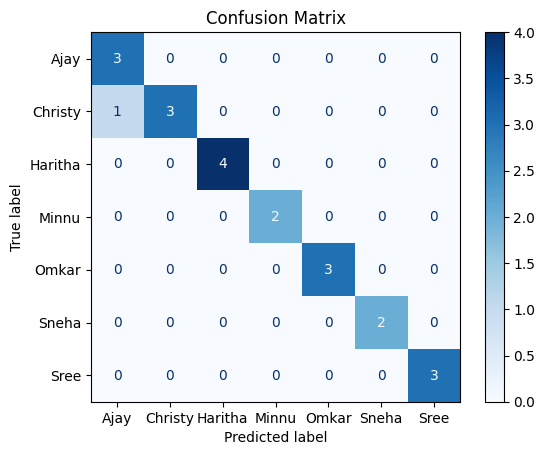

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


# Saving Models
After training save model by changinng folder and model name

In [49]:
import os
import pickle

save_dir = "/kaggle/working/facenet/SVM"
os.makedirs(save_dir, exist_ok=True)


In [50]:
svm_model_file = os.path.join(save_dir, "svm_face_recognition.pkl")

with open(svm_model_file, "wb") as f:
    pickle.dump(clf, f)

print(f"Saved svm model to {svm_model_file}")


Saved svm model to /kaggle/working/facenet/SVM/svm_face_recognition.pkl


!rm -rf /kaggle/working/*


In [167]:
import shutil

shutil.make_archive("/kaggle/working/working_dir", "zip", "/kaggle/working/")


'/kaggle/working/working_dir.zip'

# XGB

In [51]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Scale embeddings for better classifier performance
scaler = StandardScaler()
X = scaler.fit_transform(all_embeddings)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
clf = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(le.classes_),  # Number of unique labels
    eval_metric='mlogloss',
    use_label_encoder=False
)
clf.fit(X_train, y_train)

# Predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 1.0
Test Accuracy: 0.9047619047619048


In [52]:
def predict_face(image, embedder, datagen, clf, le, scaler, n_augmentations=5):
    emb = get_augmented_embedding(image, embedder, datagen, n_augmentations)
    emb_scaled = scaler.transform([emb])
    pred = clf.predict(emb_scaled)
    prob = clf.predict_proba(emb_scaled)
    return le.inverse_transform(pred)[0], np.max(prob)

# Test the prediction on a sample image (you can replace images[0] with a new image)
predicted_label, confidence = predict_face(images[0], embedder, datagen, clf, le, scaler)
print("Predicted Label:", predicted_label)
print("Confidence Score:", confidence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label: Haritha
Confidence Score: 0.8776325


# Test with single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: Sneha
Confidence Score: 0.9065603


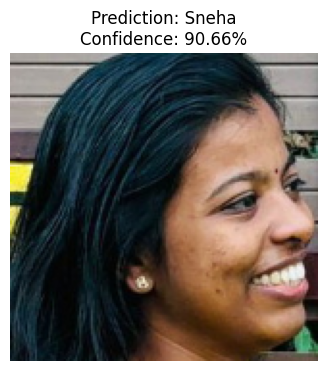

In [53]:
# Cell 10 – Test on a Single Image

# Load and preprocess a single test image
test_img_path = '/kaggle/input/facerecognition-training/test.jpg'  # Replace with your test image path
test_img = cv2.imread(test_img_path)
if test_img is None:
    raise ValueError(f"Image not found at {test_img_path}")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (160, 160))  # Resize to FaceNet's expected input size

# Predict the label and confidence using our helper function
predicted_label, confidence = predict_face(test_img, embedder, datagen, clf, le, scaler, n_augmentations=5)

print("Predicted Label:", predicted_label)
print("Confidence Score:", confidence)

# Optionally, visualize the test image with the prediction
plt.figure(figsize=(4,4))
plt.imshow(test_img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()


# checking encoding

In [54]:
# Print all class label encodings
class_mapping = {label: idx for idx, label in enumerate(le.classes_)}
print("Class Encoding Mapping:")
for label, idx in class_mapping.items():
    print(f"{label}: {idx}")


Class Encoding Mapping:
Ajay: 0
Christy: 1
Haritha: 2
Minnu: 3
Omkar: 4
Sneha: 5
Sree: 6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Label: Ajay
Confidence Score: 0.8595275


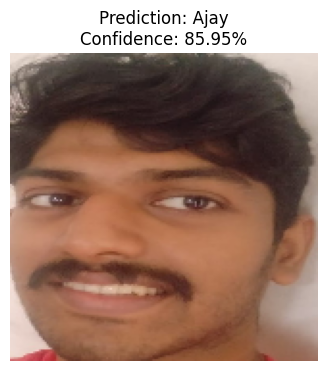

In [55]:
# Load and preprocess a single test image
test_img_path = '/kaggle/input/facenet-data/PImg/Familiar/Ajay/i01.jpeg'  # Replace with your test image path
test_img = cv2.imread(test_img_path)
if test_img is None:
    raise ValueError(f"Image not found at {test_img_path}")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (160, 160))  # Resize to FaceNet's expected input size

# Predict the label and confidence using our helper function
predicted_label, confidence = predict_face(test_img, embedder, datagen, clf, le, scaler, n_augmentations=5)

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.50:
    predicted_label = "Unfamiliar"

print("Predicted Label:", predicted_label)
print("Confidence Score:", confidence)

# Optionally, visualize the test image with the prediction
plt.figure(figsize=(4,4))
plt.imshow(test_img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()


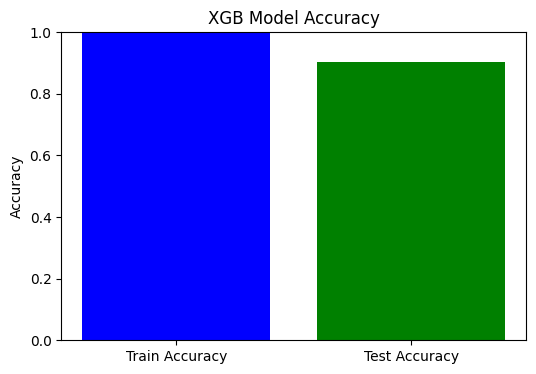

In [56]:
plt.figure(figsize=(6,4))

# Bar chart for train vs test accuracy
plt.bar(["Train Accuracy", "Test Accuracy"], [clf.score(X_train, y_train), clf.score(X_test, y_test)], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("XGB Model Accuracy")
plt.show()


<Figure size 800x600 with 0 Axes>

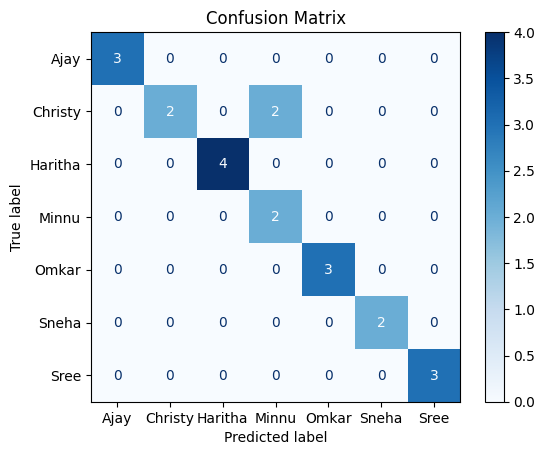

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


# savae model

In [58]:
import os
import pickle

save_dir = "/kaggle/working/facenet/XGB"
os.makedirs(save_dir, exist_ok=True)


In [59]:
xgb_model_file = os.path.join(save_dir, "xgb(90)_face_recognition.pkl")

with open(svm_model_file, "wb") as f:
    pickle.dump(clf, f)

print(f"Saved xgb model to {svm_model_file}")


Saved xgb model to /kaggle/working/facenet/SVM/svm_face_recognition.pkl


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Scale embeddings for better classifier performance
scaler = StandardScaler()
X = scaler.fit_transform(all_embeddings)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clfr = RandomForestClassifier(n_estimators=100, random_state=42)
clfr.fit(X_train, y_train)

# Predictions
y_train_pred = clfr.predict(X_train)
y_test_pred = clfr.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 1.0
Test Accuracy: 0.9047619047619048


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label: Sneha
Confidence Score: 0.83


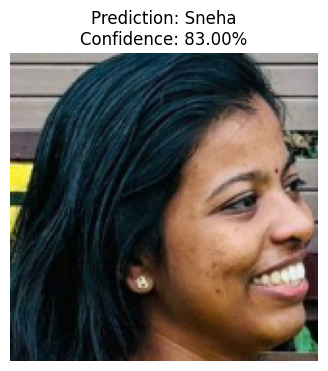

In [61]:
# Load and preprocess a single test image
test_img_path = '/kaggle/input/facerecognition-training/test.jpg'  # Replace with your test image path
test_img = cv2.imread(test_img_path)
if test_img is None:
    raise ValueError(f"Image not found at {test_img_path}")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (160, 160))  # Resize to FaceNet's expected input size

# Predict the label and confidence using our helper function
predicted_label, confidence = predict_face(test_img, embedder, datagen, clfr, le, scaler, n_augmentations=5)

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.50:
    predicted_label = "Unfamiliar"

print("Predicted Label:", predicted_label)
print("Confidence Score:", confidence)

# Optionally, visualize the test image with the prediction
plt.figure(figsize=(4,4))
plt.imshow(test_img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()


# Encoding

In [62]:
# Print all class label encodings
class_mapping = {label: idx for idx, label in enumerate(le.classes_)}
print("Class Encoding Mapping:")
for label, idx in class_mapping.items():
    print(f"{label}: {idx}")


Class Encoding Mapping:
Ajay: 0
Christy: 1
Haritha: 2
Minnu: 3
Omkar: 4
Sneha: 5
Sree: 6


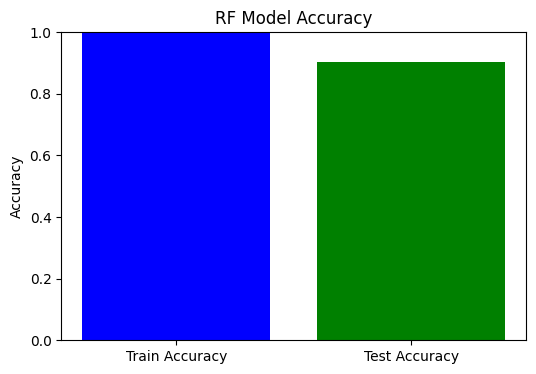

In [63]:
plt.figure(figsize=(6,4))

# Bar chart for train vs test accuracy
plt.bar(["Train Accuracy", "Test Accuracy"], [clfr.score(X_train, y_train), clfr.score(X_test, y_test)], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("RF Model Accuracy")
plt.show()


<Figure size 800x600 with 0 Axes>

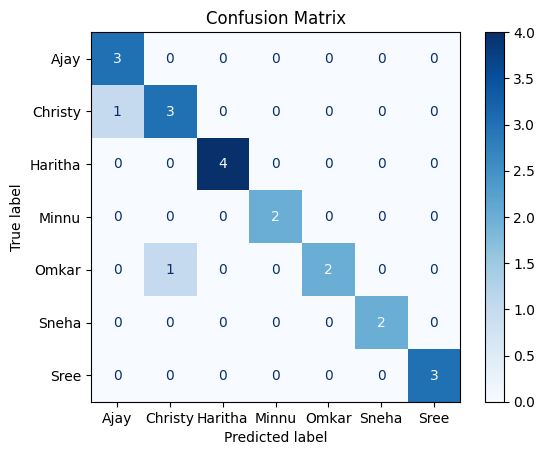

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the test set
y_pred = clfr.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


# Save model

In [65]:
import os
import pickle

save_dir = "/kaggle/working/facenet/RF"
os.makedirs(save_dir, exist_ok=True)


In [66]:
rf_model_file = os.path.join(save_dir, "rf_face_recognition.pkl")

with open(svm_model_file, "wb") as f:
    pickle.dump(clfr, f)

print(f"Saved svm model to {svm_model_file}")


Saved svm model to /kaggle/working/facenet/SVM/svm_face_recognition.pkl


# Deep Neural Network

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Scale embeddings
scaler = StandardScaler()
X = scaler.fit_transform(all_embeddings)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple DNN
dnn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(len(le.classes_), activation='softmax')  # Output layer
])

# Compile model
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_model.summary()
# Train model
history = dnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate model
train_acc = dnn_model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = dnn_model.evaluate(X_test, y_test, verbose=0)[1]

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,143 (293.53 KB)

 Trainable params: 74,759 (292.03 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1616 - loss: 2.5976 - val_accuracy: 0.2381 - val_loss: 1.9875
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5672 - loss: 1.2557 - val_accuracy: 0.4762 - val_loss: 1.4006
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7522 - loss: 0.7051 - val_accuracy: 0.6190 - val_loss: 1.0429
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9055 - loss: 0.4081 - val_accuracy: 0.8095 - val_loss: 0.8211
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9567 - loss: 0.2457 - val_accuracy: 0.8571 - val_loss: 0.6889
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9704 - loss: 0.1947 - val_accuracy: 0.8571 - val_loss: 0.6078
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9723 - loss: 0.2081 - val_accuracy: 0.8571 - val_loss: 0.5542
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9823 - loss: 0.1206 - val_accuracy: 0.8571 - val_loss: 0.5107
Ep

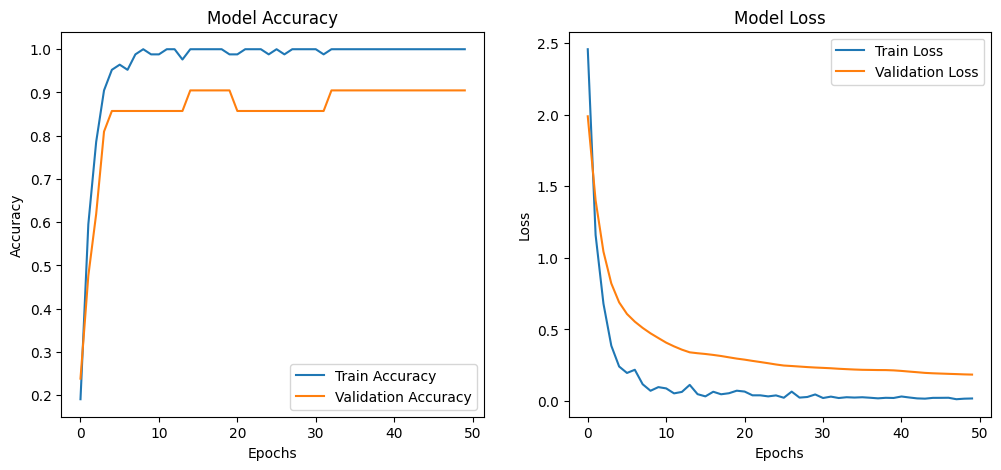

In [69]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit()
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


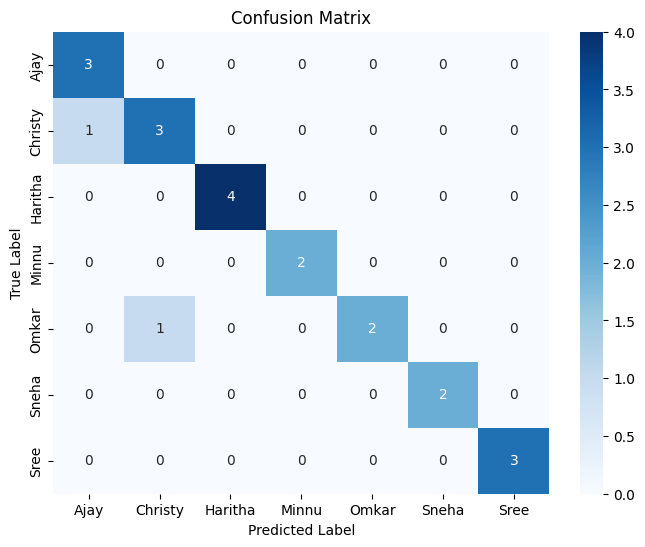

              precision    recall  f1-score   support

        Ajay       0.75      1.00      0.86         3
     Christy       0.75      0.75      0.75         4
     Haritha       1.00      1.00      1.00         4
       Minnu       1.00      1.00      1.00         2
       Omkar       1.00      0.67      0.80         3
       Sneha       1.00      1.00      1.00         2
        Sree       1.00      1.00      1.00         3

    accuracy                           0.90        21
   macro avg       0.93      0.92      0.92        21
weighted avg       0.92      0.90      0.90        21



In [70]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report




# If y_test and y_pred are already class labels (not one-hot)
y_pred_classes = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))



# Evaluation on an image

Predicted Label: Sneha
Confidence Score: 0.83


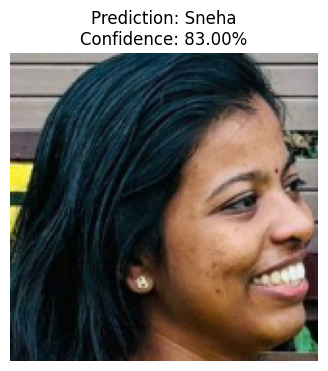

In [110]:
# Load and preprocess a single test image
test_img_path = '/kaggle/input/facerecognition-training/test.jpg'  # Replace with your test image path
test_img = cv2.imread(test_img_path)
if test_img is None:
    raise ValueError(f"Image not found at {test_img_path}")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (160, 160))  # Resize to FaceNet's expected input size

# Predict the label and confidence using our helper function
import numpy as np

def predict_face(image, embedder, datagen, clf, le, scaler, n_augmentations=5):
    """Predict face label and confidence score using a trained DNN model"""
    
    # Generate FaceNet embeddings
    emb = embedder.embeddings([image])  # Ensure this returns a 1D array
    emb_scaled = scaler.transform([emb])  # Standardize embeddings
    
    # Get class probabilities using `predict()`
    prob = clf.predict(emb_scaled)[0]  # Returns array of probabilities
    
    # Get predicted label and confidence
    predicted_class_idx = np.argmax(prob)  # Class with highest probability
    predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert index to label
    confidence = prob[predicted_class_idx]  # Extract confidence score
    
    return predicted_label, confidence

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.50:
    predicted_label = "Unfamiliar"

print("Predicted Label:", predicted_label)
print("Confidence Score:", confidence)

# Optionally, visualize the test image with the prediction
plt.figure(figsize=(4,4))
plt.imshow(test_img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()


# Save Model

In [75]:
import os

# Define save path
save_dir = "facenet/DNN/"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

DNN_model_file = os.path.join(save_dir, "DNN_face_recognition.h5")

# Save the Keras model correctly
dnn_model.save(DNN_model_file)

print(f"Saved DNN model to {DNN_model_file}")


Saved DNN model to facenet/DNN/DNN_face_recognition.h5


# TCN

In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define TCN block
def TCNBlock(filters, kernel_size, dilation_rate):
    return keras.Sequential([
        layers.Conv1D(filters, kernel_size, padding="causal", dilation_rate=dilation_rate, activation='relu'),
        layers.BatchNormalization(),
        layers.SpatialDropout1D(0.3)
    ])

# Build TCN model
input_layer = keras.Input(shape=(X.shape[1], 1))  # Reshape embeddings for 1D processing
x = TCNBlock(64, kernel_size=3, dilation_rate=1)(input_layer)
x = TCNBlock(128, kernel_size=3, dilation_rate=2)(x)
x = TCNBlock(256, kernel_size=3, dilation_rate=4)(x)
x = layers.GlobalAveragePooling1D()(x)  # Feature aggregation
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(len(le.classes_), activation='softmax')(x)

# Compile Model
tcn_model = keras.Model(inputs=input_layer, outputs=output_layer)
tcn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tcn_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 512, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 512, 64)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 512, 128)            │          25,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 512, 256)            │          99,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,111 (621.53 KB)

 Trainable params: 158,215 (618.03 KB)

 Non-trainable params: 896 (3.50 KB)

In [77]:
# Reshape embeddings for 1D CNN processing
X_train_reshaped = X_train[..., None]  # Adding a channel dimension
X_test_reshaped = X_test[..., None]


In [78]:
# Train model
history = tcn_model.fit(
    X_train_reshaped, y_train, 
    validation_data=(X_test_reshaped, y_test), 
    epochs=50, 
    batch_size=32
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.2186 - loss: 1.9471 - val_accuracy: 0.0952 - val_loss: 1.9476
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2106 - loss: 1.8561 - val_accuracy: 0.0952 - val_loss: 1.9476
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3406 - loss: 1.8193 - val_accuracy: 0.0952 - val_loss: 1.9452
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3365 - loss: 1.7457 - val_accuracy: 0.2857 - val_loss: 1.9379
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3153 - loss: 1.7392 - val_accuracy: 0.1429 - val_loss: 1.9305
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3447 - loss: 1.6988 - val_accuracy: 0.1429 - val_loss: 1.9227
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3581 - loss: 1.6618 - val_accuracy: 0.1429 - val_loss: 1.9173
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4427 - loss: 1.5843 - val_accuracy: 0.1429 - val_loss: 1.9164
E

In [79]:
# Evaluate the model
train_acc = tcn_model.evaluate(X_train_reshaped, y_train, verbose=0)[1]
test_acc = tcn_model.evaluate(X_test_reshaped, y_test, verbose=0)[1]

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Train Accuracy: 21.43%
Test Accuracy: 23.81%


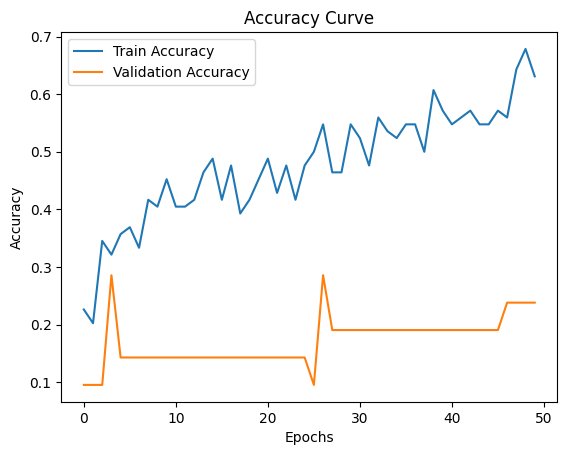

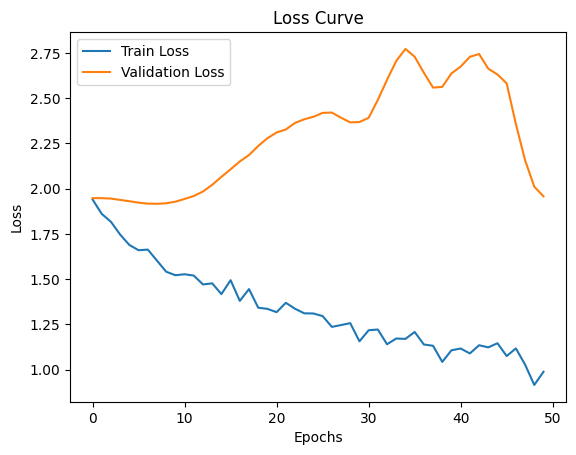

In [80]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


FaceNet embeddings are already highly meaningful.

FaceNet produces well-separated embeddings. Using a temporal-based architecture (TCN) on non-sequential 1D vectors might not be ideal.
Conv1D might not work well for embeddings.

1D CNNs work best with sequential time-series data, not static feature vectors like FaceNet embeddings.
Lack of a well-structured feature extractor.

The network might be too shallow to learn proper class separations from embeddings.
Dataset imbalance or too many classes.

If your dataset has imbalanced classes, the model might be predicting the most frequent class.
Try checking the class distribution.

# Deep Residual Fully Connected Network
Instead of a plain DNN, use ResNet-style skip connections.


In [119]:
from tensorflow.keras import layers, models
import numpy as np

def build_residual_dnn(input_dim, num_classes):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(512, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    # Residual Connection
    res = layers.Dense(512, activation='relu')(x)
    res = layers.BatchNormalization()(res)
    res = layers.Dropout(0.4)(res)
    x = layers.Add()([x, res])  # Skip connection

    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Ensure X_train and le.classes_ exist
if 'X_train' not in locals() or 'le' not in locals():
    raise ValueError("X_train and le must be defined before building the model.")

# Check shape
print("X_train shape:", X_train.shape)
if len(X_train.shape) == 1:
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

# Ensure sparse labels
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

# Build model
model = build_residual_dnn(X_train.shape[1], len(le.classes_))
model.summary()

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

model


X_train shape: (84, 512)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 512)            │        262,656 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 512)            │          2,048 │ dense_20[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 512)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 512)            │        262,656 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 512)            │          2,048 │ dense_21[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 512)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_66 (Add)              │ (None, 512)            │              0 │ dropout_14[0][0],      │
│                           │                        │                │ dropout_15[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 256)            │        131,328 │ add_66[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 256)            │          1,024 │ dense_22[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_16 (Dropout)      │ (None, 256)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 7)              │          1,799 │ dropout_16[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 663,559 (2.53 MB)

 Trainable params: 660,999 (2.52 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2997 - loss: 2.1965 - val_accuracy: 0.6667 - val_loss: 1.0889
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9018 - loss: 0.3982 - val_accuracy: 0.8095 - val_loss: 0.6208
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0833 - val_accuracy: 0.9048 - val_loss: 0.4562
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9842 - loss: 0.0720 - val_accuracy: 0.9048 - val_loss: 0.3748
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0334 - val_accuracy: 0.8571 - val_loss: 0.3539
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9725 - loss: 0.0456 - val_accuracy: 0.8571 - val_loss: 0.3524
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.8571 - val_loss: 0.3603
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0136 - val_accuracy: 0.8571 - val_loss: 0.3664
Ep

<Functional name=functional_9, built=True>

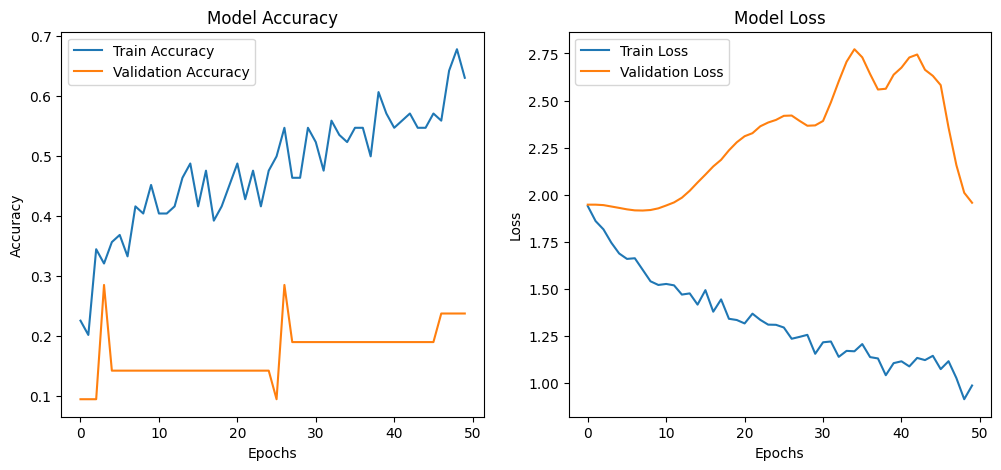

In [120]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit()
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


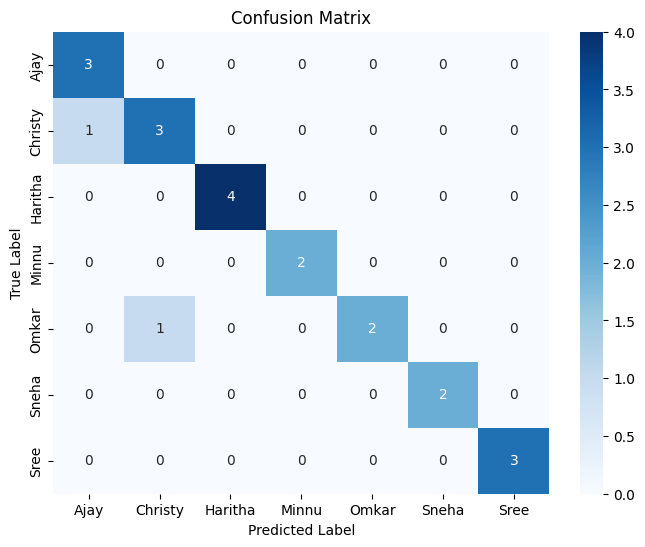

              precision    recall  f1-score   support

        Ajay       0.75      1.00      0.86         3
     Christy       0.75      0.75      0.75         4
     Haritha       1.00      1.00      1.00         4
       Minnu       1.00      1.00      1.00         2
       Omkar       1.00      0.67      0.80         3
       Sneha       1.00      1.00      1.00         2
        Sree       1.00      1.00      1.00         3

    accuracy                           0.90        21
   macro avg       0.93      0.92      0.92        21
weighted avg       0.92      0.90      0.90        21



In [121]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report




# If y_test and y_pred are already class labels (not one-hot)
y_pred_classes = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))



In [135]:
import os

# Define save path
save_dir = "facenet/RDNN/"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

DNN_model_file = os.path.join(save_dir, "RDNN_face_recognition.h5")

# Save the Keras model correctly
dnn_model.save(DNN_model_file)

print(f"Saved DNN model to {DNN_model_file}")


Saved DNN model to facenet/RDNN/RDNN_face_recognition.h5


In [136]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("/kaggle/working/facenet/RDNN/RDNN_face_recognition.h5")  # Ensure this path is correct

# Load scaler and label encoder (used during training)
import joblib
scaler = joblib.load("/kaggle/working/facenet/embeddings/scaler.pkl")  # StandardScaler or MinMaxScaler used in training
le = joblib.load("/kaggle/working/facenet/embeddings/label_encoder.pkl")  # LabelEncoder for classes

# Load and preprocess the test image
def preprocess_image(image_path, embedder, scaler):
    """Convert an image to a numerical feature vector"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to match FaceNet input

    # Generate FaceNet embeddings
    embedding = embedder.embeddings([img])  # Ensure output is (1, feature_dim)

    # Scale features using the same scaler from training
    embedding_scaled = scaler.transform(embedding)

    return embedding_scaled

# Load FaceNet model for feature extraction
from keras_facenet import FaceNet
embedder = FaceNet()

# Provide image path
test_img_path = "/kaggle/input/facerecognition-training/test.jpg"  # Replace with your actual test image

# Preprocess
test_embedding = preprocess_image(test_img_path, embedder, scaler)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [137]:
# Predict class probabilities
probabilities = model.predict(test_embedding)  # Output shape: (1, num_classes)

# Get predicted label
predicted_class_idx = np.argmax(probabilities)  # Highest probability index
predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert index to label
confidence = probabilities[0, predicted_class_idx]  # Confidence score

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.50:
    predicted_label = "Unfamiliar"

# Display results
print(f"Predicted Label: {predicted_label}")
print(f"Confidence Score: {confidence*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predicted Label: Sneha
Confidence Score: 100.00%


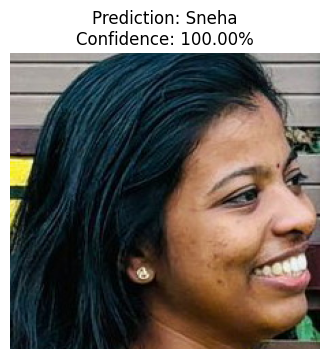

In [138]:
import matplotlib.pyplot as plt

# Load image for display
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')
plt.show()


# Rest-DNN
✅ Skip connections improve gradient flow and prevent vanishing gradients.
✅ Batch normalization & dropout help generalization.
✅ Deeper layers capture richer face features.

In [139]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K

def soft_thresholding(x):
    """Soft thresholding function to reduce noise in residual connections."""
    abs_x = K.abs(x)
    threshold = K.mean(abs_x, axis=-1, keepdims=True)
    return K.sign(x) * K.maximum(abs_x - threshold, 0)

def build_rest_dnn(input_dim, num_classes):
    inputs = layers.Input(shape=(input_dim,))
    
    # Initial Dense Layer
    x = layers.Dense(512, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    
    # Residual Shrinkage Block
    res = layers.Dense(512, activation='relu')(x)
    res = layers.BatchNormalization()(res)
    res = layers.Lambda(soft_thresholding)(res)  # Shrinkage operation
    x = layers.Add()([x, res])  # Skip connection
    
    # More FC layers
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    res_model = models.Model(inputs, outputs)
    res_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    res_model.summary()
    return res_model


In [140]:
res_model = build_rest_dnn(X_train.shape[1], len(le.classes_))
history = res_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 512)            │        262,656 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 512)            │          2,048 │ dense_24[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 512)            │        262,656 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 512)            │          2,048 │ dense_25[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_189 (Lambda)       │ (None, 512)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_193 (Add)             │ (None, 512)            │              0 │ batch_normalization_1… │
│                           │                        │                │ lambda_189[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 256)            │        131,328 │ add_193[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 256)            │          1,024 │ dense_26[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 256)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 128)            │         32,896 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 128)            │            512 │ dense_27[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 7)              │            903 │ dropout_18[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 696,071 (2.66 MB)

 Trainable params: 693,255 (2.64 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3175 - loss: 2.1872 - val_accuracy: 0.2857 - val_loss: 1.8046
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9351 - loss: 0.3100 - val_accuracy: 0.5238 - val_loss: 1.3930
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9410 - loss: 0.1442 - val_accuracy: 0.6190 - val_loss: 1.1492
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0694 - val_accuracy: 0.6667 - val_loss: 0.9839
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9823 - loss: 0.0530 - val_accuracy: 0.7619 - val_loss: 0.8693
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0344 - val_accuracy: 0.8095 - val_loss: 0.7817
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0130 - val_accuracy: 0.8095 - val_loss: 0.7100
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0271 - val_accuracy: 0.8095 - val_loss: 0.6584
Ep

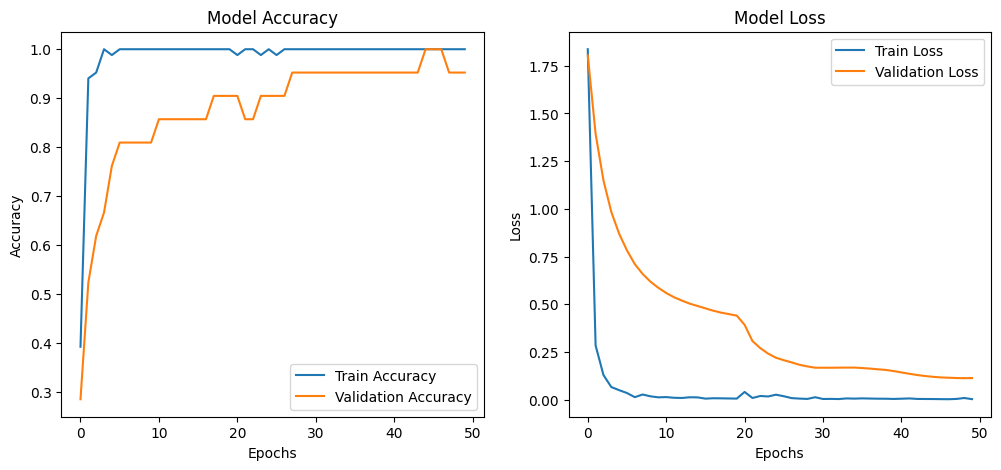

In [141]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit()
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


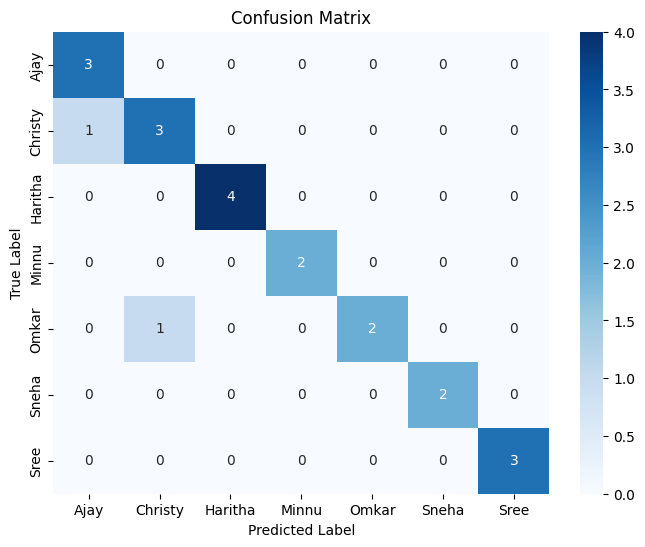

              precision    recall  f1-score   support

        Ajay       0.75      1.00      0.86         3
     Christy       0.75      0.75      0.75         4
     Haritha       1.00      1.00      1.00         4
       Minnu       1.00      1.00      1.00         2
       Omkar       1.00      0.67      0.80         3
       Sneha       1.00      1.00      1.00         2
        Sree       1.00      1.00      1.00         3

    accuracy                           0.90        21
   macro avg       0.93      0.92      0.92        21
weighted avg       0.92      0.90      0.90        21



In [142]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report




# If y_test and y_pred are already class labels (not one-hot)
y_pred_classes = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))



In [143]:
import os

# Define save path
save_dir = "facenet/RestDNN/"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

DNN_model_file = os.path.join(save_dir, "RestDNN_face_recognition.h5")

# Save the Keras model correctly
dnn_model.save(DNN_model_file)

print(f"Saved DNN model to {DNN_model_file}")


Saved DNN model to facenet/RestDNN/RestDNN_face_recognition.h5


In [162]:
import numpy as np
import cv2
import joblib
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
import albumentations as A  # For image augmentation

# Load trained model
model = load_model("/kaggle/working/facenet/RestDNN/RestDNN_face_recognition.h5")

# Load scaler and label encoder
scaler = joblib.load("/kaggle/working/facenet/embeddings/scaler.pkl")
le = joblib.load("/kaggle/working/facenet/embeddings/label_encoder.pkl")

# Load FaceNet model for feature extraction
embedder = FaceNet()

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),  # Random flip
    A.Rotate(limit=20, p=0.5),  # Rotate randomly between -20 and +20 degrees
    A.RandomBrightnessContrast(p=0.5)  # Adjust brightness & contrast
])

# Load and preprocess image with augmentation
def preprocess_and_augment(image_path, embedder, scaler, n_augmentations=5):
    """Generate multiple augmented embeddings from an image"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (160, 160))  # Resize to FaceNet's expected size

    embeddings = []
    
    for _ in range(n_augmentations):
        augmented_img = augmentations(image=img)['image']  # Apply augmentation
        emb = embedder.embeddings([augmented_img])  # Extract embedding
        embeddings.append(emb[0])  # Store the 1D embedding

    # Scale embeddings
    embeddings_scaled = scaler.transform(embeddings)
    
    return embeddings_scaled  # Returns multiple embeddings

# Provide image path
test_img_path = "/kaggle/input/facerecognition-training/output2.jpg"

# Generate embeddings from augmented images
test_embeddings = preprocess_and_augment(test_img_path, embedder, scaler)

# Predict on each augmented embedding
predictions = model.predict(test_embeddings)  # Shape: (n_augmentations, num_classes)

# Average predictions across augmentations
avg_probabilities = np.mean(predictions, axis=0)

# Get predicted label
predicted_class_idx = np.argmax(avg_probabilities)  # Highest probability index
predicted_label = le.inverse_transform([predicted_class_idx])[0]  # Convert index to label
confidence = avg_probabilities[predicted_class_idx]  # Confidence score

# If confidence is below 50%, classify as "Unfamiliar"
if confidence < 0.50:
    predicted_label = "Unfamiliar"

# Display results
print(f"Predicted Label: {predicted_label}")
print(f"Confidence Score: {confidence*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicted Label: Unfamiliar
Confidence Score: 46.30%


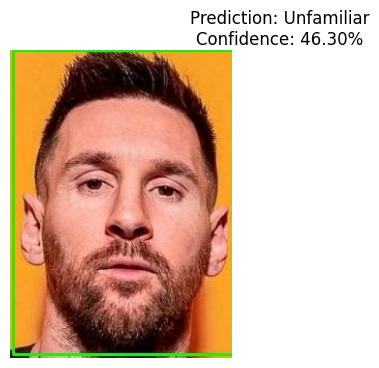

In [163]:
import matplotlib.pyplot as plt

# Load and display original image
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Define figure size
plt.figure(figsize=(8, 4))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
# Display both images
plt.suptitle(f"Prediction: {predicted_label}\nConfidence: {confidence*100:.2f}%", fontsize=12)
plt.show()
